Retno Prabaningrum / retnoprabaningrum81@gmail.com

Crypto Price Predictions using Machine Learning (Python Implementation)

1. Importing the libraries and dataset.
2. Checking the Values.
3. Remove the Duplicates Data.
4. Checked Null Values.
5. Examining Changes Data.
6. Visualization.
7. Prediction.
8. Checking for Correlation.

In [22]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/crypto prices.csv')
data.head()

,Unnamed: 0,Date,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
0,0,11/9/2017,1.99077,19192200,7143.580078,3226249984,1.00818,358188000,320.884003,893249984
1,1,11/10/2017,1.79684,11155000,6618.140137,5208249856,1.00601,756446016,299.252991,885985984
2,2,11/11/2017,1.67047,8178150,6357.600098,4908680192,1.00899,746227968,314.681000,842300992
3,3,11/12/2017,1.51969,15298700,5950.069824,8957349888,1.01247,1466060032,307.907990,1613479936
4,4,11/13/2017,1.68662,12238800,6559.490234,6263249920,1.00935,767884032,316.716003,1041889984


In [4]:
data.tail()

,Unnamed: 0,Date,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
1725,1725,7/31/2022,283.579468,1313531523,23336.896484,23553591896,1.000328,52267348020,1681.517334,14200735370
1726,1726,8/1/2022,283.539490,1314157614,23314.199219,25849159141,1.000204,50882756969,1635.195801,16191371176
1727,1727,8/2/2022,283.820984,1768344106,22978.117188,28389250717,1.000159,54793315279,1632.945435,20426082309
1728,1728,8/3/2022,298.356781,2133584480,22846.507813,26288169966,1.000204,47717439471,1618.874512,16786218830
1729,1729,8/4/2022,310.706055,1926587001,22858.423828,24817580032,1.000133,44526180493,1608.205811,14467440626


In [5]:
data.shape

(1730, 10)

In [6]:
data.columns

Index(['Unnamed: 0', 'Date', 'Adj Close (BNB)', 'Volume (BNB)',
       'Adj Close (BTC)', 'Volume (BTC)', 'Adj Close (USDT)', 'Volume (USDT)',
       'Adj Close (ETH)', 'Volume (ETH)'],
      dtype='object')

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Unnamed: 0          0
Date                0
Adj Close (BNB)     0
Volume (BNB)        0
Adj Close (BTC)     0
Volume (BTC)        0
Adj Close (USDT)    0
Volume (USDT)       0
Adj Close (ETH)     0
Volume (ETH)        0
dtype: int64

In [9]:
data.values

array([[0, '11/9/2017', 1.99077, ..., 358188000, 320.884003, 893249984],
       [1, '11/10/2017', 1.79684, ..., 756446016, 299.252991, 885985984],
       [2, '11/11/2017', 1.67047, ..., 746227968, 314.681, 842300992],
       ...,
       [1727, '8/2/2022', 283.820984, ..., 54793315279, 1632.945435,
        20426082309],
       [1728, '8/3/2022', 298.356781, ..., 47717439471, 1618.874512,
        16786218830],
       [1729, '8/4/2022', 310.706055, ..., 44526180493, 1608.205811,
        14467440626]], dtype=object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1730 non-null   int64  
 1   Date              1730 non-null   object 
 2   Adj Close (BNB)   1730 non-null   float64
 3   Volume (BNB)      1730 non-null   int64  
 4   Adj Close (BTC)   1730 non-null   float64
 5   Volume (BTC)      1730 non-null   int64  
 6   Adj Close (USDT)  1730 non-null   float64
 7   Volume (USDT)     1730 non-null   int64  
 8   Adj Close (ETH)   1730 non-null   float64
 9   Volume (ETH)      1730 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 135.3+ KB


In [11]:
data.describe()

,Unnamed: 0,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
count,1730.0000,1730.000000,1.730000e+03,1730.000000,1.730000e+03,1730.000000,1.730000e+03,1730.000000,1.730000e+03
mean,864.5000,134.960777,9.647885e+08,20191.519348,2.570080e+10,1.001717,4.085393e+10,1105.603148,1.288480e+10
std,499.5523,185.725539,1.486405e+09,17507.045641,2.003526e+10,0.005928,3.912941e+10,1233.514214,1.104728e+10
min,0.0000,1.510360,9.284000e+03,3236.761719,2.923670e+09,0.966644,3.581880e+08,84.308296,6.217330e+08
25%,432.2500,13.670646,1.177502e+08,7457.858887,9.718123e+09,0.999968,4.705288e+09,203.758255,3.844413e+09
50%,864.5000,22.234484,3.079566e+08,10330.514649,2.313310e+10,1.000601,3.348729e+10,436.047501,1.047600e+10
75%,1296.7500,288.047844,1.467549e+09,35538.384766,3.518178e+10,1.002838,6.087353e+10,1828.478180,1.823330e+10
max,1729.0000,675.684082,1.798295e+10,67566.828125,3.509679e+11,1.077880,2.790675e+11,4812.087402,8.448291e+10


In [12]:
data.nunique()

Unnamed: 0          1730
Date                1730
Adj Close (BNB)     1730
Volume (BNB)        1730
Adj Close (BTC)     1729
Volume (BTC)        1730
Adj Close (USDT)    1517
Volume (USDT)       1730
Adj Close (ETH)     1730
Volume (ETH)        1730
dtype: int64

In [13]:
data.head()

,Unnamed: 0,Date,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
0,0,11/9/2017,1.99077,19192200,7143.580078,3226249984,1.00818,358188000,320.884003,893249984
1,1,11/10/2017,1.79684,11155000,6618.140137,5208249856,1.00601,756446016,299.252991,885985984
2,2,11/11/2017,1.67047,8178150,6357.600098,4908680192,1.00899,746227968,314.681000,842300992
3,3,11/12/2017,1.51969,15298700,5950.069824,8957349888,1.01247,1466060032,307.907990,1613479936
4,4,11/13/2017,1.68662,12238800,6559.490234,6263249920,1.00935,767884032,316.716003,1041889984


In [14]:
data.to_csv('crypto prices.csv')

In [15]:
data

,Unnamed: 0,Date,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
0,0,11/9/2017,1.990770,19192200,7143.580078,3226249984,1.008180,358188000,320.884003,893249984
1,1,11/10/2017,1.796840,11155000,6618.140137,5208249856,1.006010,756446016,299.252991,885985984
2,2,11/11/2017,1.670470,8178150,6357.600098,4908680192,1.008990,746227968,314.681000,842300992
3,3,11/12/2017,1.519690,15298700,5950.069824,8957349888,1.012470,1466060032,307.907990,1613479936
4,4,11/13/2017,1.686620,12238800,6559.490234,6263249920,1.009350,767884032,316.716003,1041889984
...,...,...,...,...,...,...,...,...,...,...
1725,1725,7/31/2022,283.579468,1313531523,23336.896484,23553591896,1.000328,52267348020,1681.517334,14200735370
1726,1726,8/1/2022,283.539490,1314157614,23314.199219,25849159141,1.000204,50882756969,1635.195801,16191371176
1727,1727,8/2/2022,283.820984,1768344106,22978.117188,28389250717,1.000159,54793315279,1632.945435,20426082309
1728,1728,8/3/2022,298.356781,2133584480,22846.507813,26288169966,1.000204,47717439471,1618.874512,16786218830


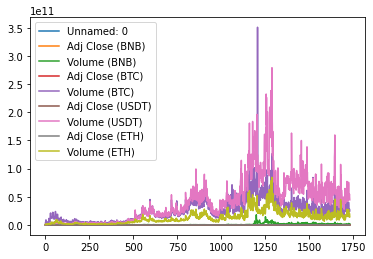

In [19]:
data.plot()

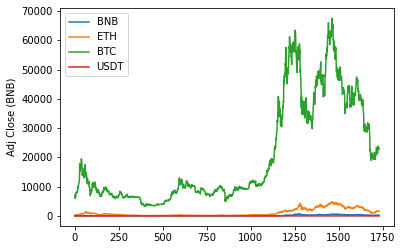

In [23]:
sns.lineplot(data = data['Adj Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Adj Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Adj Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Adj Close (USDT)'], label = 'USDT')

In [24]:
data.corr('kendall')

,Unnamed: 0,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
Unnamed: 0,1.000000,0.657076,0.642062,0.516824,0.505834,-0.212706,0.678813,0.400244,0.609714
Adj Close (BNB),0.657076,1.000000,0.759044,0.703578,0.503948,-0.174493,0.622169,0.590500,0.585718
Volume (BNB),0.642062,0.759044,1.000000,0.639009,0.659666,-0.145888,0.743432,0.483405,0.730896
Adj Close (BTC),0.516824,0.703578,0.639009,1.000000,0.493778,-0.172465,0.557869,0.717167,0.530621
Volume (BTC),0.505834,0.503948,0.659666,0.493778,1.000000,-0.097599,0.781526,0.293249,0.810815
Adj Close (USDT),-0.212706,-0.174493,-0.145888,-0.172465,-0.097599,1.000000,-0.138536,-0.221390,-0.124771
Volume (USDT),0.678813,0.622169,0.743432,0.557869,0.781526,-0.138536,1.000000,0.371513,0.851066
Adj Close (ETH),0.400244,0.590500,0.483405,0.717167,0.293249,-0.221390,0.371513,1.000000,0.358480
Volume (ETH),0.609714,0.585718,0.730896,0.530621,0.810815,-0.124771,0.851066,0.358480,1.000000
